#Latihan 12 Neighbor Pixel
Nama: Akbar Hamonangan Lubis
| NPM: 19312116


In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
im1 = Image.open("asset_praktikum_akbar.jpg").resize((255,255)).convert("L")
arr1 = np.array(im1.copy())
arr2 = np.array(im1.copy())

In [13]:
keys = np.arange(256)
hist1 = np.zeros((256), dtype= np.uint32)
hist2 = np.zeros((256), dtype= np.uint32)
kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]], np.single)
hs = np.floor(kernel.shape[0]/2).astype(np.uint32)

In [14]:
for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        if(random.random()>0.97):
           arr1[y,x] = 255
        if(random.random()<0.03):
            arr1[y,x] = 0

In [15]:
for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        hist1[arr1[y,x]] = hist1[arr1[y,x]]+1;
        tmp = 0;
        for ky in range(kernel.shape[0]):
            for kx in range(kernel.shape[0]):
                py = min(max(y+ky-hs,0),arr1.shape[0]-1)
                px = min(max(x+kx-hs,0),arr1.shape[1]-1)
                tmp = tmp +arr1[py,px]*kernel[ky,kx]
            arr2[y,x] = np.floor(tmp).astype(np.uint8)
            hist2[arr2[y,x]] = hist2[arr2[y,x]]+1;

In [16]:
cdf1 = hist1.cumsum()
cdf1_norm = cdf1 * float(hist1.max()) / cdf1.max()

In [17]:
cdf2 = hist2.cumsum()
cdf2_norm = cdf2 * float(hist2.max()) / cdf2.max()

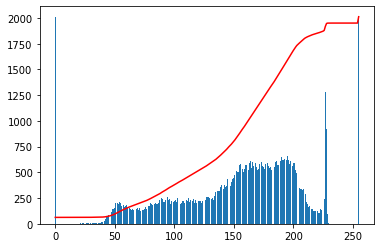

In [18]:
fig = plt.figure(1)
plt.bar(keys,hist1)
plt.plot(cdf1_norm, color = 'r')
fig.canvas.draw()
data1 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data1 = data1.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImage1 = Image.fromarray(data1).resize((255,255)).convert("L")
histNp1 = np.array(histImage1)

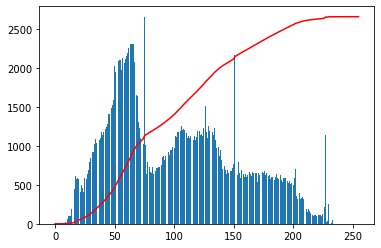

In [19]:
fig = plt.figure(2)
plt.bar(keys,hist2)
plt.plot(cdf2_norm, color = 'r')
fig.canvas.draw()
data2 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data2 = data2.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImage2 = Image.fromarray(data2).resize((255,255)).convert("L")
histNp2 = np.array(histImage2)

In [22]:
Image.fromarray(np.hstack(( np.vstack((histNp1,arr1)), np.vstack((histNp2,arr2))))).show()